#  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> <m>Contents:

[Problem 1 - Linear Regression](#Problem_1)
    
    Questions:
[1.1](#1.1)
[1.2](#1.2)
[1.3](#1.3)
[1.4](#1.4)
    
[Problem 2 - Logistic Regression and LDA](#Problem_2)
    
    Questions:
[2.1](#2.1)
[2.2](#2.2)
[2.3](#2.3)
[2.4](#2.4)
    

In [1]:
#Import necessary Libraries


import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder                 #Z-score scaling
from sklearn.linear_model import LinearRegression, LogisticRegression          #Linear and Logistic Regression model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis           #LDA model
from sklearn.model_selection import train_test_split                           #Train-test split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, plot_confusion_matrix #Model Evaluation technique
from sklearn.model_selection import GridSearchCV                               #Grid search cross validation

%matplotlib inline   

# Remove warnings

import warnings
warnings.filterwarnings('ignore')

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black"> <u> Problem 1 - Linear Regression
<a id='Problem_1'></a>
    
<font color=darkblue>You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

 </font> 

<b> 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis. </b>
<a id='1.1'></a>

In [2]:
#Import the dataset
gem = pd.read_csv('cubic_zirconia.csv')

In [3]:
gem.head(5) #Head of the dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
#Dropping the column Unnamed: 0 since its index value and not necessary for building the model

gem.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
# Shape of the dataset
print('There are ',gem.shape[0],' rows and ',gem.shape[1],' columns in the dataset.' )

There are  26967  rows and  10  columns in the dataset.


In [6]:
gem.info() #Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
gem.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [8]:
# Check for duplicate records
dup = gem.duplicated()
print('There are ', dup.sum(),' records which are duplicates')

There are  34  records which are duplicates


In [9]:
gem[dup].head()

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906


In [10]:
#Drop duplicate records and creating a new DataFrame df without duplicate records
df = gem.drop_duplicates()

In [11]:
#Shape of the dataset after removing the duplicates
print('After removing duplicates, there are ',df.shape[0],' rows and ',df.shape[1],' columns in the dataset.' )

After removing duplicates, there are  26933  rows and  10  columns in the dataset.


In [12]:
#Check for null values
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [13]:
num =[] #Summary statistics for numerical data
cat = [] #Cartegorical columns

for i in df.columns:
    if df[i].dtypes != 'int64' and df[i].dtypes != 'float64':
        cat.append(i)
    else:
        num.append(i)
df[num].describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [14]:
df[cat].describe()

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


In [15]:
#Unique values and count of unique values in each category
for column in df[cat]:
    print(column.upper(), ': ', df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [16]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


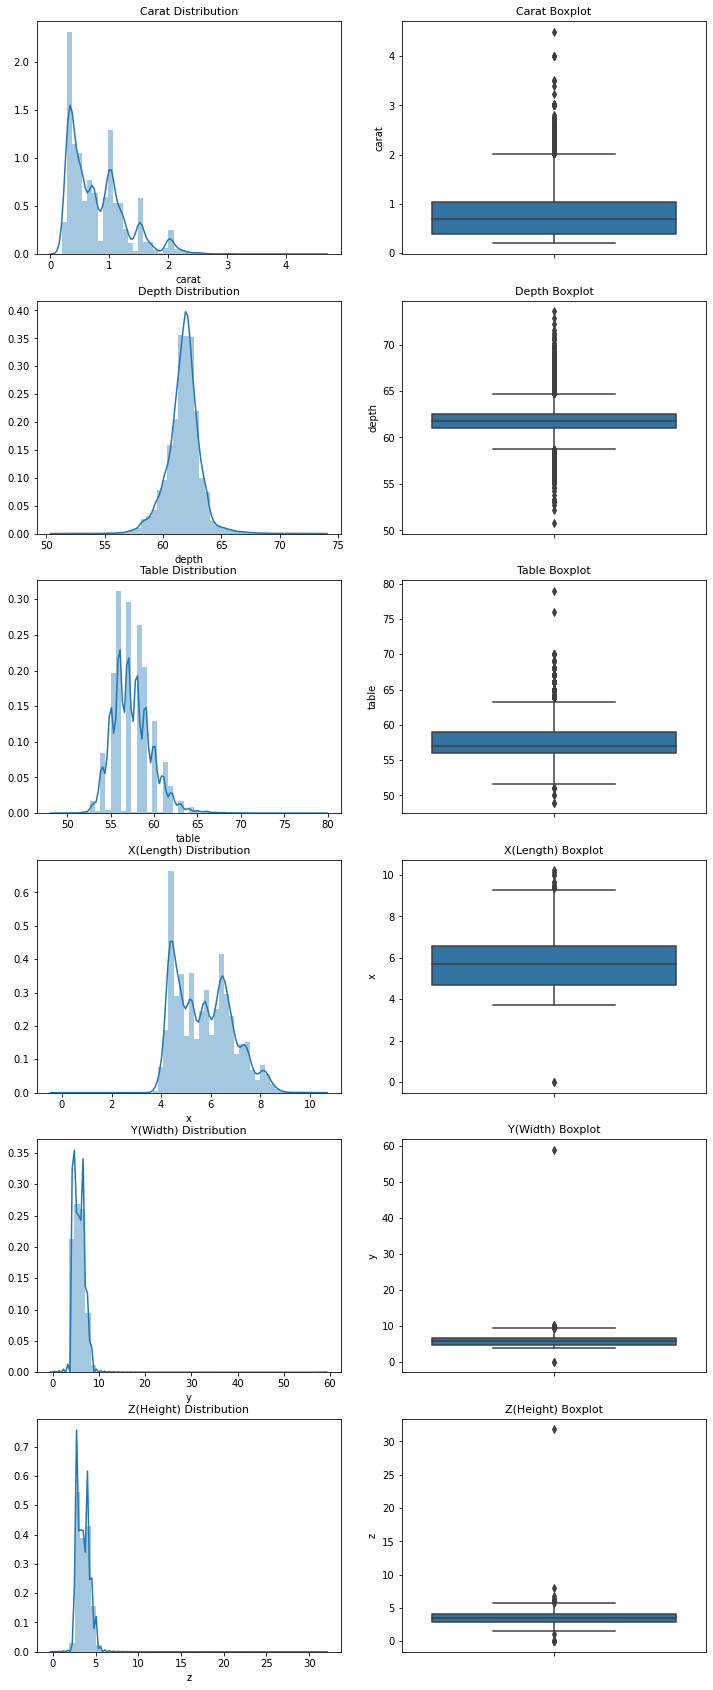

In [17]:
## Univariate Analysis

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12, 30)

a = sns.distplot(df.carat , ax=axes[0][0])
a.set_title("Carat Distribution",fontsize=11)
a = sns.boxplot(df.carat , orient = "v" , ax=axes[0][1])
a.set_title("Carat Boxplot",fontsize=11)

a = sns.distplot(df.depth, ax=axes[1][0])
a.set_title("Depth Distribution",fontsize=11)
a = sns.boxplot(df.depth , orient = "v" , ax=axes[1][1])
a.set_title("Depth Boxplot",fontsize=11)

a = sns.distplot(df.table, ax=axes[2][0])
a.set_title("Table Distribution",fontsize=11)
a = sns.boxplot(df.table, orient = "v" , ax=axes[2][1])
a.set_title("Table Boxplot",fontsize=11)

a = sns.distplot(df.x , ax=axes[3][0])
a.set_title("X(Length) Distribution",fontsize=11)
a = sns.boxplot(df.x , orient = "v" , ax=axes[3][1])
a.set_title("X(Length) Boxplot",fontsize=11)

a = sns.distplot(df.y , ax=axes[4][0])
a.set_title("Y(Width) Distribution",fontsize=11)
a = sns.boxplot(df.y , orient = "v" , ax=axes[4][1])
a.set_title("Y(Width) Boxplot",fontsize=11)

a = sns.distplot(df.z , ax=axes[5][0])
a.set_title("Z(Height) Distribution",fontsize=11)
a = sns.boxplot(df.z , orient = "v" , ax=axes[5][1])
a.set_title("Z(Height) Boxplot",fontsize=11)
plt.show()

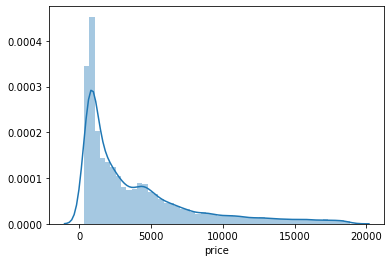

In [18]:
sns.distplot(df.price);

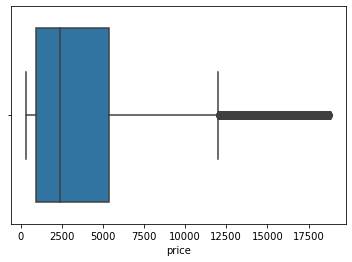

In [19]:
sns.boxplot(df.price);

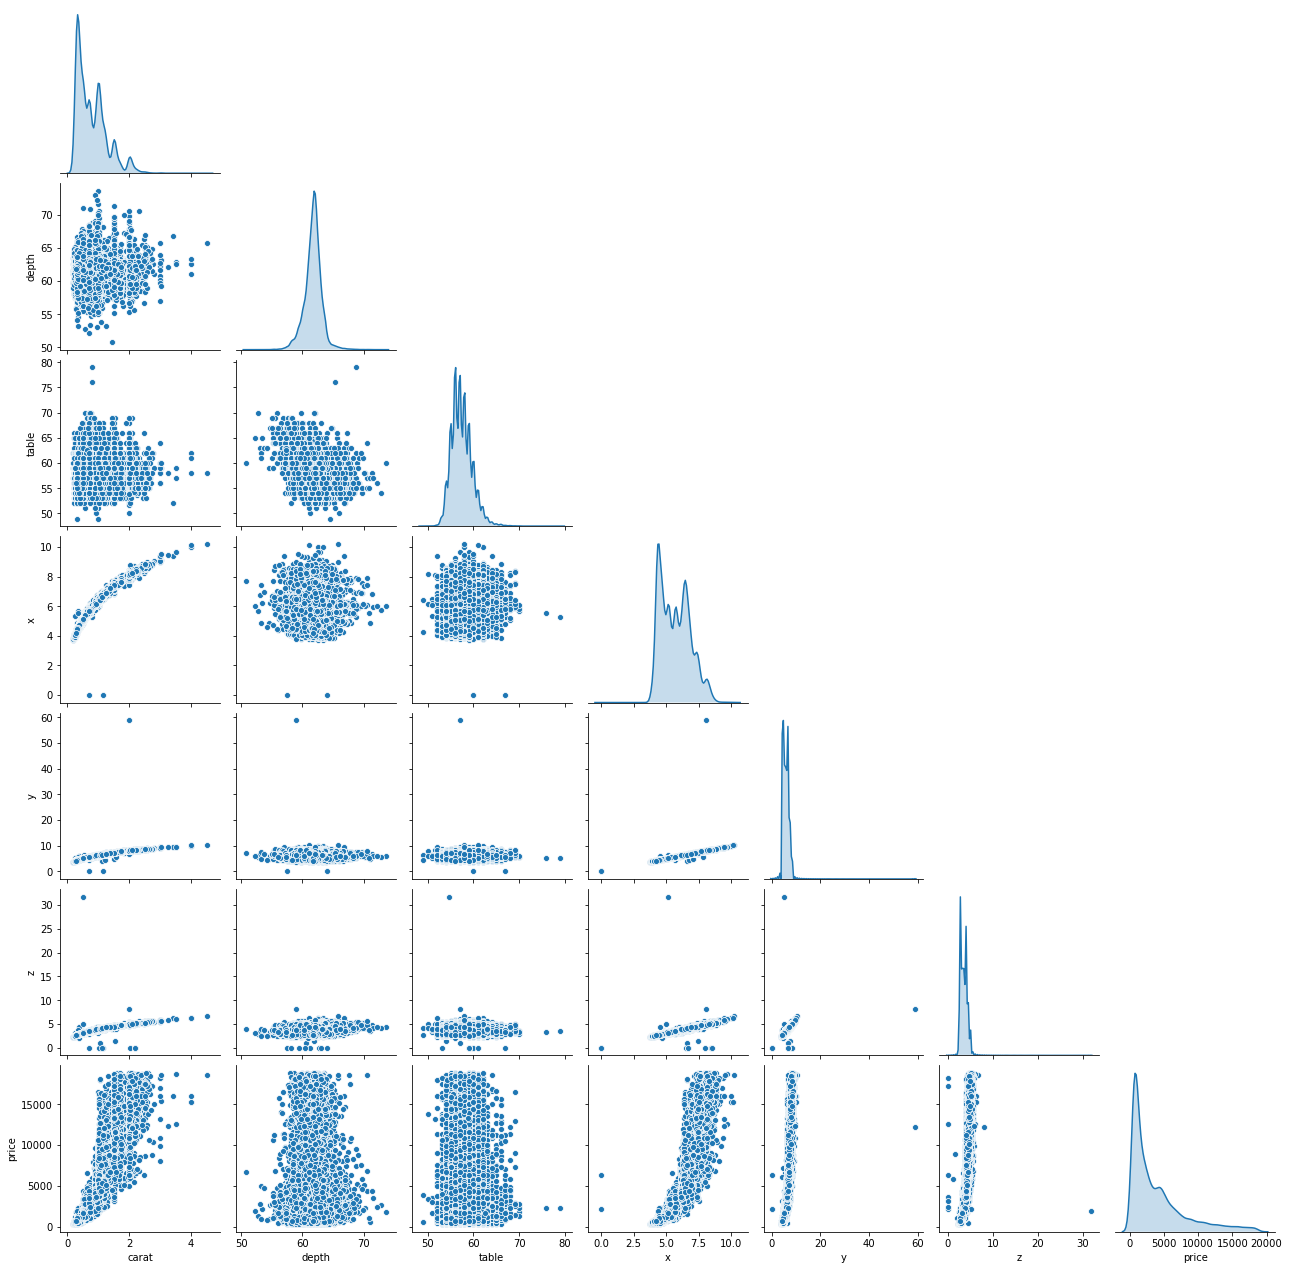

In [20]:
#Bivariate analysis using pairplot

sns.pairplot(df, diag_kind = 'kde', corner = True);

,cut,price
2,Ideal,3454.820639
1,Good,3926.336756
4,Very Good,4032.267961
3,Premium,4544.558525
0,Fair,4568.096154


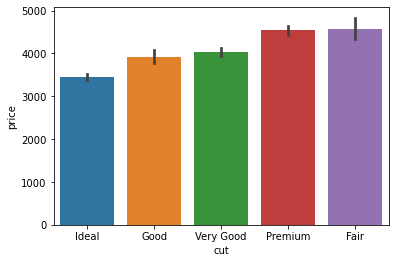

In [21]:
result = df.groupby(["cut"])['price'].aggregate(np.mean).reset_index().sort_values('price')
sns.barplot(df.cut,df.price, order = result['cut']);
result

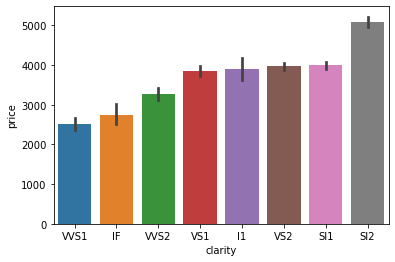

In [22]:
result = df.groupby(["clarity"])['price'].aggregate(np.mean).reset_index().sort_values('price')
sns.barplot(df.clarity,df.price, order = result['clarity']);

,color,price
1,E,3073.940399
0,D,3184.827597
2,F,3699.944527
3,G,4005.046170
4,H,4477.932112
5,I,5124.816637
6,J,5329.706250


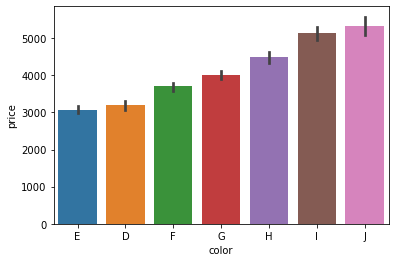

In [23]:
result = df.groupby(["color"])['price'].aggregate(np.mean).reset_index().sort_values('price')
sns.barplot(df.color,df.price, order = result['color']);
result

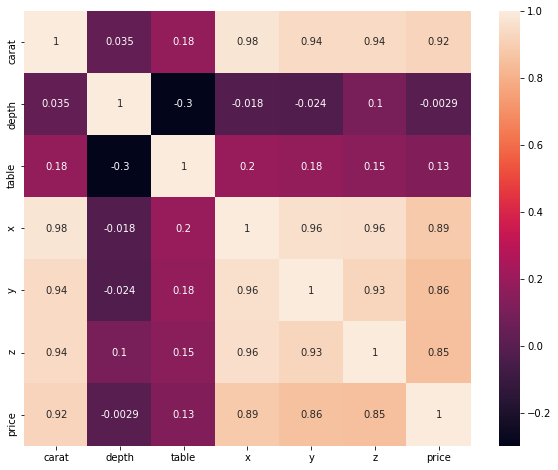

In [24]:
corr = df.corr()
plt.figure(figsize =(10,8))
sns.heatmap(corr, annot = True);

<b> 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case? </b>
<a id='1.2'></a>

In [25]:
#Finding null values in the dataset
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [26]:
#Getting the records which has NaN values 
df[df.isnull().any(axis =1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [28]:
df['depth'] = df['depth'].round(1)
df.tail(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
26957,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,1.10,Very Good,D,SI2,58.9,63.0,6.76,6.69,3.94,4361
26961,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [27]:
#Depth percentage is calculated by dividing the cubic zirconia's total height by its total width. Hence using the columns z(height) 
#and y(width) to impute the missing NaN values in depth instead of the median or mean, since this can be more accurate.
df['depth'] = df.apply(lambda row: ((row['z']/row['y'])*100) if np.isnan(row['depth']) else row['depth'],axis =1)

In [29]:
#Checking for values which are 0 in each column
df[(df.z == 0) | (df.y == 0) | (df.x ==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [30]:
med_x = df['x'].median()
df['x'][df.x ==0] = med_x

med_y = df['y'].median()
df['y'][df.y ==0] = med_y

df['z'] = df.apply(lambda row: ((row['depth'] * row['y'])/100) if row['z'] == 0 else row['z'],axis =1)
df[(df.z == 0) | (df.y == 0) | (df.x ==0)]


,carat,cut,color,clarity,depth,table,x,y,z,price


In [31]:
df['z'] = df['z'].round(2)
df.iloc[5820]

carat      0.71
cut        Good
color         F
clarity     SI2
depth      64.1
table        60
x          5.69
y           5.7
z          3.65
price      2130
Name: 5821, dtype: object

In [32]:
df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.764508,57.455950,5.729769,5.733525,3.539031,3937.526120
std,0.477237,3.669426,2.232156,1.126285,1.163989,0.717570,4022.551862
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,617.500000,79.000000,10.230000,58.900000,31.800000,18818.000000


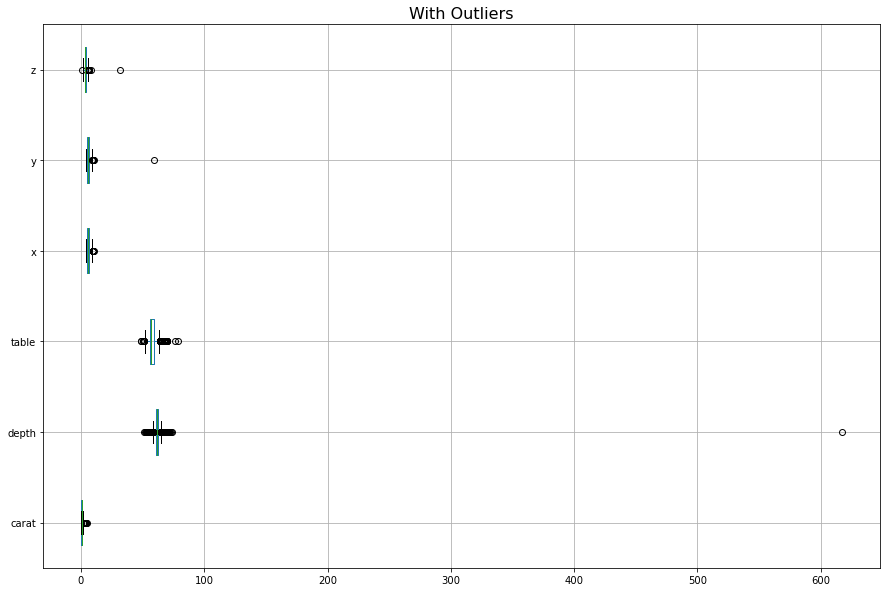

In [33]:
# Outliers check
cols = ['carat', 'depth', 'table','x','y','z']
plt.figure(figsize=(15,10))
df[cols].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

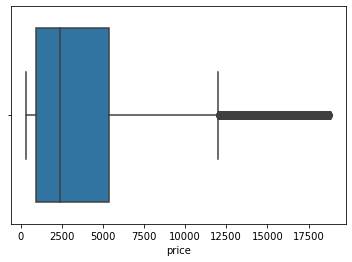

In [34]:
sns.boxplot(df.price);

In [35]:
#Outlier treatment:

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [36]:
#Outlier removal for all columns
column = ['carat', 'depth', 'table','x','y','z', 'price']
for column in column:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

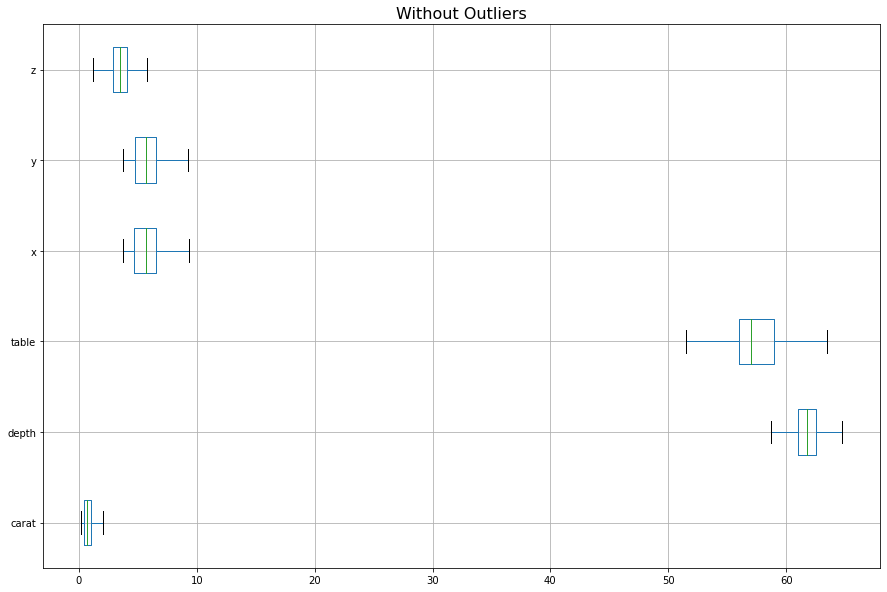

In [37]:
#After outliers removal

plt.figure(figsize=(15,10))
df[cols].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

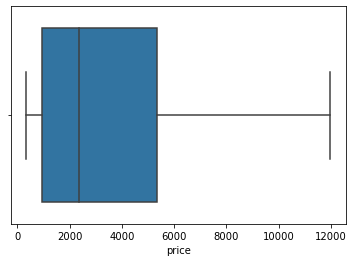

In [38]:
sns.boxplot(df.price);

In [39]:
df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.793298,61.742884,57.435544,5.729601,5.731526,3.537836,3735.832213
std,0.462127,1.260647,2.157119,1.125704,1.117663,0.695777,3468.207359
min,0.200000,58.750000,51.500000,3.730000,3.710000,1.190000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,2.025000,64.750000,63.500000,9.310000,9.270000,5.750000,11972.500000


##### Scaling the dataset:

Since the units of the independent variables are different, for example, x, y and z are represented in mm, carat is in weight, depth and table are represented as percentages. Also, the magnitude of each variables differs, depth and table are in 100s while rest of the numerical variables are within 10s range. 

Even though all the variables are in numerical forms, its not easy to compare them because of the units and range. Scaling will allow for all our data to be transformed to a more normal distribution. For this case study, standard scaler from sklearn has been used to transform the variables.

Scaling does not affect the model score or r2 or coefficient of determinant. Trend of the predictor and predicted variables would remain the same. Intercept and coefficients of the features will change. This would remove any effects that would be present from one variable from having an incorrect magnitude of influence on our predictor variable.



<b> 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE. </b>
<a id='1.3'></a>

In [40]:
df_c = df.copy()

In [41]:
#Encoding the column 'cut' based on the order: Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
#Fair: 0, Good: 1, Very Good: 2, Premium: 3, Ideal: 4

cut_dict = { 'Fair': 0,
           'Good' : 1,
           'Very Good' : 2,
           'Premium' : 3,
           'Ideal' : 4}
df_c['cut'] = df_c.cut.map(cut_dict)
df_c.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [42]:
#Encoding the column 'color' based on the order: With D being the best and J the worst.
#J: 0, I: 1, H: 2, G: 3, F: 4, E: 5, D: 6

color_dict = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6 }
df_c['color'] = df_c.color.map(color_dict)
df_c.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,5,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,5,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,4,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,4,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [43]:
#Encoding the column 'clarity' based on the order: Best to Worst, FL = flawless, I3= level 3 inclusions) 
#FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
#FL: 10, IF: 9, VVS1: 8, VVS2: 7, VS1: 6, VS2: 5, SI1: 4, SI2: 3, I1: 2, I2: 1, I3: 0

clarity_dict = {'FL': 10, 'IF': 9, 'VVS1': 8, 'VVS2': 7, 'VS1': 6, 'VS2': 5, 'SI1': 4, 'SI2': 3, 'I1': 2, 'I2': 1, 'I3': 0}
df_c['clarity'] = df_c.clarity.map(clarity_dict)
df_c.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,5,4,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,9,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,5,7,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,4,6,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,4,8,60.4,59.0,4.35,4.43,2.65,779.0


In [44]:
df_c.info() #All variables are of numericals type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 3.5 MB


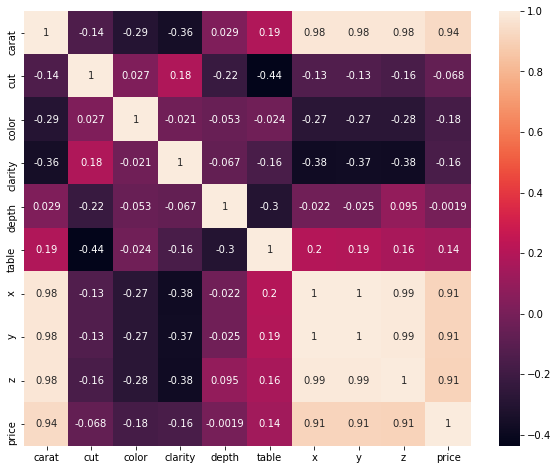

In [45]:
corr = df_c.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True);

In [46]:
#Seperating the dependent and independent variables
X = df_c.drop('price', axis =1) #Predictor variables
y = df_c['price'] #Predicted variable

#Data Split: Split the data into test and train (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 1)

In [47]:
y_train

22114     537.0
2275      844.0
19183    1240.0
5030     4065.0
25414    4057.0
          ...  
10962     673.0
17304    1657.0
5193     6354.0
12179    4845.0
235      8446.0
Name: price, Length: 18853, dtype: float64

In [48]:
#Apply Linear regression

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [49]:
reg_model.coef_

array([ 8898.12425223,   111.18675983,   278.50252355,   440.29840209,
          59.78428967,   -12.35525117, -1109.93410592,  1562.36713427,
       -1358.22299282])

In [50]:
#Coefficients of the each of the independent attribute

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, reg_model.coef_[idx]))

The coefficient for carat is 8898.124252230295
The coefficient for cut is 111.18675983002295
The coefficient for color is 278.50252354727553
The coefficient for clarity is 440.29840209088536
The coefficient for depth is 59.78428967313763
The coefficient for table is -12.355251174441161
The coefficient for x is -1109.934105923697
The coefficient for y is 1562.3671342668335
The coefficient for z is -1358.2229928198985


In [51]:
#Intercept value of the model 

intercept = reg_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -7584.659914264399


In [52]:
# R square on training data
reg_model.score(X_train, y_train)

0.9313992954826447

In [53]:
# R square on testing data
reg_model.score(X_test, y_test)

0.9313747793678043

In [54]:
#RMSE on Training data
from sklearn import metrics
ypred_train=reg_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,ypred_train))

907.7098447011185

In [55]:
#RMSE on Testing data
ypred_test=reg_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,ypred_test))

910.0605162381265

In [56]:
#Linear Regression using statsmodels

# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2,2,5,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4,5,5,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4,3,4,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1,5,3,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3,4,3,61.1,62.0,6.54,6.49,3.98,4057.0


In [57]:
data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
16997,1.26,3,1,4,60.50,62.0,6.97,6.92,4.20,5292.0
24457,0.90,2,3,5,58.75,59.0,6.35,6.36,3.72,4484.0
16612,1.37,4,4,6,59.60,57.0,7.28,7.22,4.32,11649.0
308,0.84,1,3,6,63.60,57.0,5.98,5.93,3.79,3316.0
26652,2.00,2,0,5,60.80,62.0,8.09,8.12,4.93,11972.5


In [58]:
#Formula for the model
expr = 'price ~ carat + cut + color +clarity + x + y + z + depth + table'

In [59]:
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -7584.659914
carat        8898.124252
cut           111.186760
color         278.502524
clarity       440.298402
x           -1109.934106
y            1562.367134
z           -1358.222993
depth          59.784290
table         -12.355251
dtype: float64

In [60]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.843e+04
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:50:03   Log-Likelihood:            -1.5516e+05
No. Observations:               18853   AIC:                         3.103e+05
Df Residuals:                   18843   BIC:                         3.104e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7584.6599    867.304     -8.745      0.000   -9284.653   -5884.667
carat       8898.1243     82.527    107.821      0.000    8736.364    9059.884
cut          111.1868      7.343     15.142      0.000      96.794     125.579
color        278.5025      4.105     67.842      0.000     270.456     286.549
clarity      440.2984      4.456     98.820      0.000     431.565     449.032
x          -1109.9341    125.690     -8.831      0.000   -1356.298    -863.570
y           1562.3671    124.975     12.501      0.000    1317.405    1807.330
z          -1358.2230    161.748     -8.397      0.000   -1675.263   -1041.183
depth         59.7843     12.231      4.888      0.000      35.810      83.759
table        -12.3553      3.918     -3.154      0.002     -20.034      -4.676
==============================================================================
Omnibus:                     2758.812   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9123.011
Skew:                           0.744   Prob(JB):                         0.00
Kurtosis:                       6.066   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

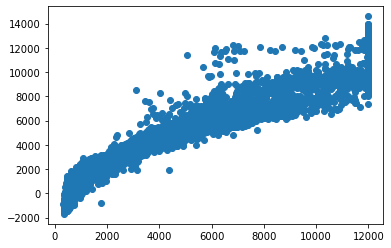

In [61]:
plt.scatter(y_test, ypred_test)
plt.show()

#### Perform linear regression after scaling the variables

In [62]:
#Using standard scaler

from scipy.stats import zscore

scaled_df =  df_c.apply(zscore)

In [63]:
scaled_df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04
mean,-2.106922e-16,1.225747e-16,-2.957654e-16,6.618962e-17,-4.688685e-15,-9.184186e-16,-2.094143e-16,-4.864403e-16,-2.574540e-16,-1.777890e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.283866e+00,-2.613949e+00,-1.990088e+00,-1.854341e+00,-2.374130e+00,-2.751657e+00,-1.776344e+00,-1.808742e+00,-3.374473e+00,-9.831867e-01
25%,-8.510759e-01,-8.172365e-01,-8.176528e-01,-6.398044e-01,-5.892991e-01,-6.655034e-01,-9.057618e-01,-9.050536e-01,-9.167427e-01,-8.047051e-01
50%,-2.018913e-01,8.111992e-02,-2.314354e-01,-3.253586e-02,4.530759e-02,-2.019136e-01,-3.517940e-02,-2.820761e-02,-2.563583e-02,-3.923807e-01
75%,5.554907e-01,9.794763e-01,9.409994e-01,5.747326e-01,6.005884e-01,7.252659e-01,7.288011e-01,7.233747e-01,7.217441e-01,4.671572e-01
max,2.665341e+00,9.794763e-01,1.527217e+00,2.396538e+00,2.385420e+00,2.811420e+00,3.180645e+00,3.166017e+00,3.179474e+00,2.374950e+00


In [64]:
#Seperating the dependent and independent variables
X = scaled_df.drop('price', axis =1) #Predictor variables
y = scaled_df['price'] #Predicted variable

#Data Split: Split the data into test and train (70:30)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size =0.3, random_state = 1)

In [65]:
reg_model1 = LinearRegression()
reg_model1.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [66]:
reg_model1.coef_

array([ 1.18564461,  0.03568678,  0.13698513,  0.20905924,  0.02173079,
       -0.00768459, -0.36026029,  0.5034877 , -0.27248085])

In [67]:
#Coefficients of the each of the independent attribute

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, reg_model1.coef_[idx]))

The coefficient for carat is 1.1856446075903604
The coefficient for cut is 0.03568678325150828
The coefficient for color is 0.1369851306273955
The coefficient for clarity is 0.20905923962421621
The coefficient for depth is 0.02173078564862485
The coefficient for table is -0.007684590372751462
The coefficient for x is -0.36026028993942183
The coefficient for y is 0.5034876998995872
The coefficient for z is -0.27248085477189865


In [68]:
reg_model1.intercept_

0.0011970211918373972

In [69]:
#Intercept value of the model 

intercept = reg_model1.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0011970211918373972


In [70]:
# R square or model accuracy for training data
reg_model1.score(X_train_scaled, y_train_scaled)

0.9313992954826446

In [71]:
#R square or model accuracy for testing data
reg_model1.score(X_test_scaled, y_test_scaled)

0.9313747793678043

In [72]:
#Root mean squared error for training data
ypred_train_scaled=reg_model1.predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,ypred_train_scaled))

0.261727919516596

In [73]:
#Root mean squared error for testing data
ypred_test_scaled=reg_model1.predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,ypred_test_scaled))

0.26240570920284817

In [76]:
#Linear Regression using statsmodels

# concatenate X and y into a single dataframe
data_train_scaled = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test_scaled=pd.concat([X_test_scaled,y_test_scaled],axis=1)
data_train_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,-0.980913,-0.817237,-0.817653,-0.032536,0.521263,1.188856,-1.172267,-1.155581,-1.117960,-0.922347
2275,-1.067471,0.979476,0.940999,-0.032536,-0.430647,-1.129093,-1.225568,-1.271897,-1.276060,-0.833827
19183,-0.634681,0.979476,-0.231435,-0.639804,0.600588,-0.201914,-0.568189,-0.609789,-0.528680,-0.719645
5030,0.663688,-1.715593,0.940999,-1.247073,1.235195,-0.665503,0.711034,0.759164,0.879844,0.094912
25414,0.490572,0.081120,0.354782,-1.247073,-0.509973,2.116035,0.719918,0.678638,0.635508,0.092605


In [74]:
#Formula for the model
expr1 = 'price ~ carat + cut + clarity + color + x '

In [77]:
#Intercept and coefficients using statsmodels
lm2 = smf.ols(formula= expr1, data = data_train_scaled).fit()
lm2.params

Intercept    0.001140
carat        1.174126
cut          0.040401
clarity      0.212196
color        0.137306
x           -0.116245
dtype: float64

In [78]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.057e+04
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:54:14   Log-Likelihood:                -1584.5
No. Observations:               18853   AIC:                             3181.
Df Residuals:                   18847   BIC:                             3228.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0011      0.002      0.595      0.552      -0.003       0.005
carat          1.1741      0.011    110.872      0.000       1.153       1.195
cut            0.0404      0.002     20.473      0.000       0.037       0.044
clarity        0.2122      0.002    100.640      0.000       0.208       0.216
color          0.1373      0.002     67.706      0.000       0.133       0.141
x             -0.1162      0.011    -10.968      0.000      -0.137      -0.095
==============================================================================
Omnibus:                     2664.875   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9260.165
Skew:                           0.704   Prob(JB):                         0.00
Kurtosis:                       6.131   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#Root mean squared error for training data
ypred_train1=lm2.predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,ypred_train1))

0.2631855551297661

In [80]:
#Root mean squared error for training data
ypred_test1=lm2.predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,ypred_test1))

0.26403122153716

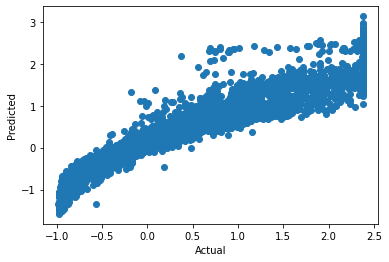

In [81]:
plt.scatter(y_test_scaled, ypred_test1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

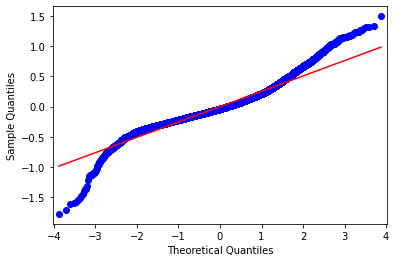

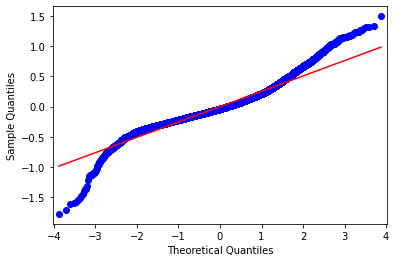

In [83]:
residuals = y_train_scaled - ypred_train_scaled
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line = 'r')


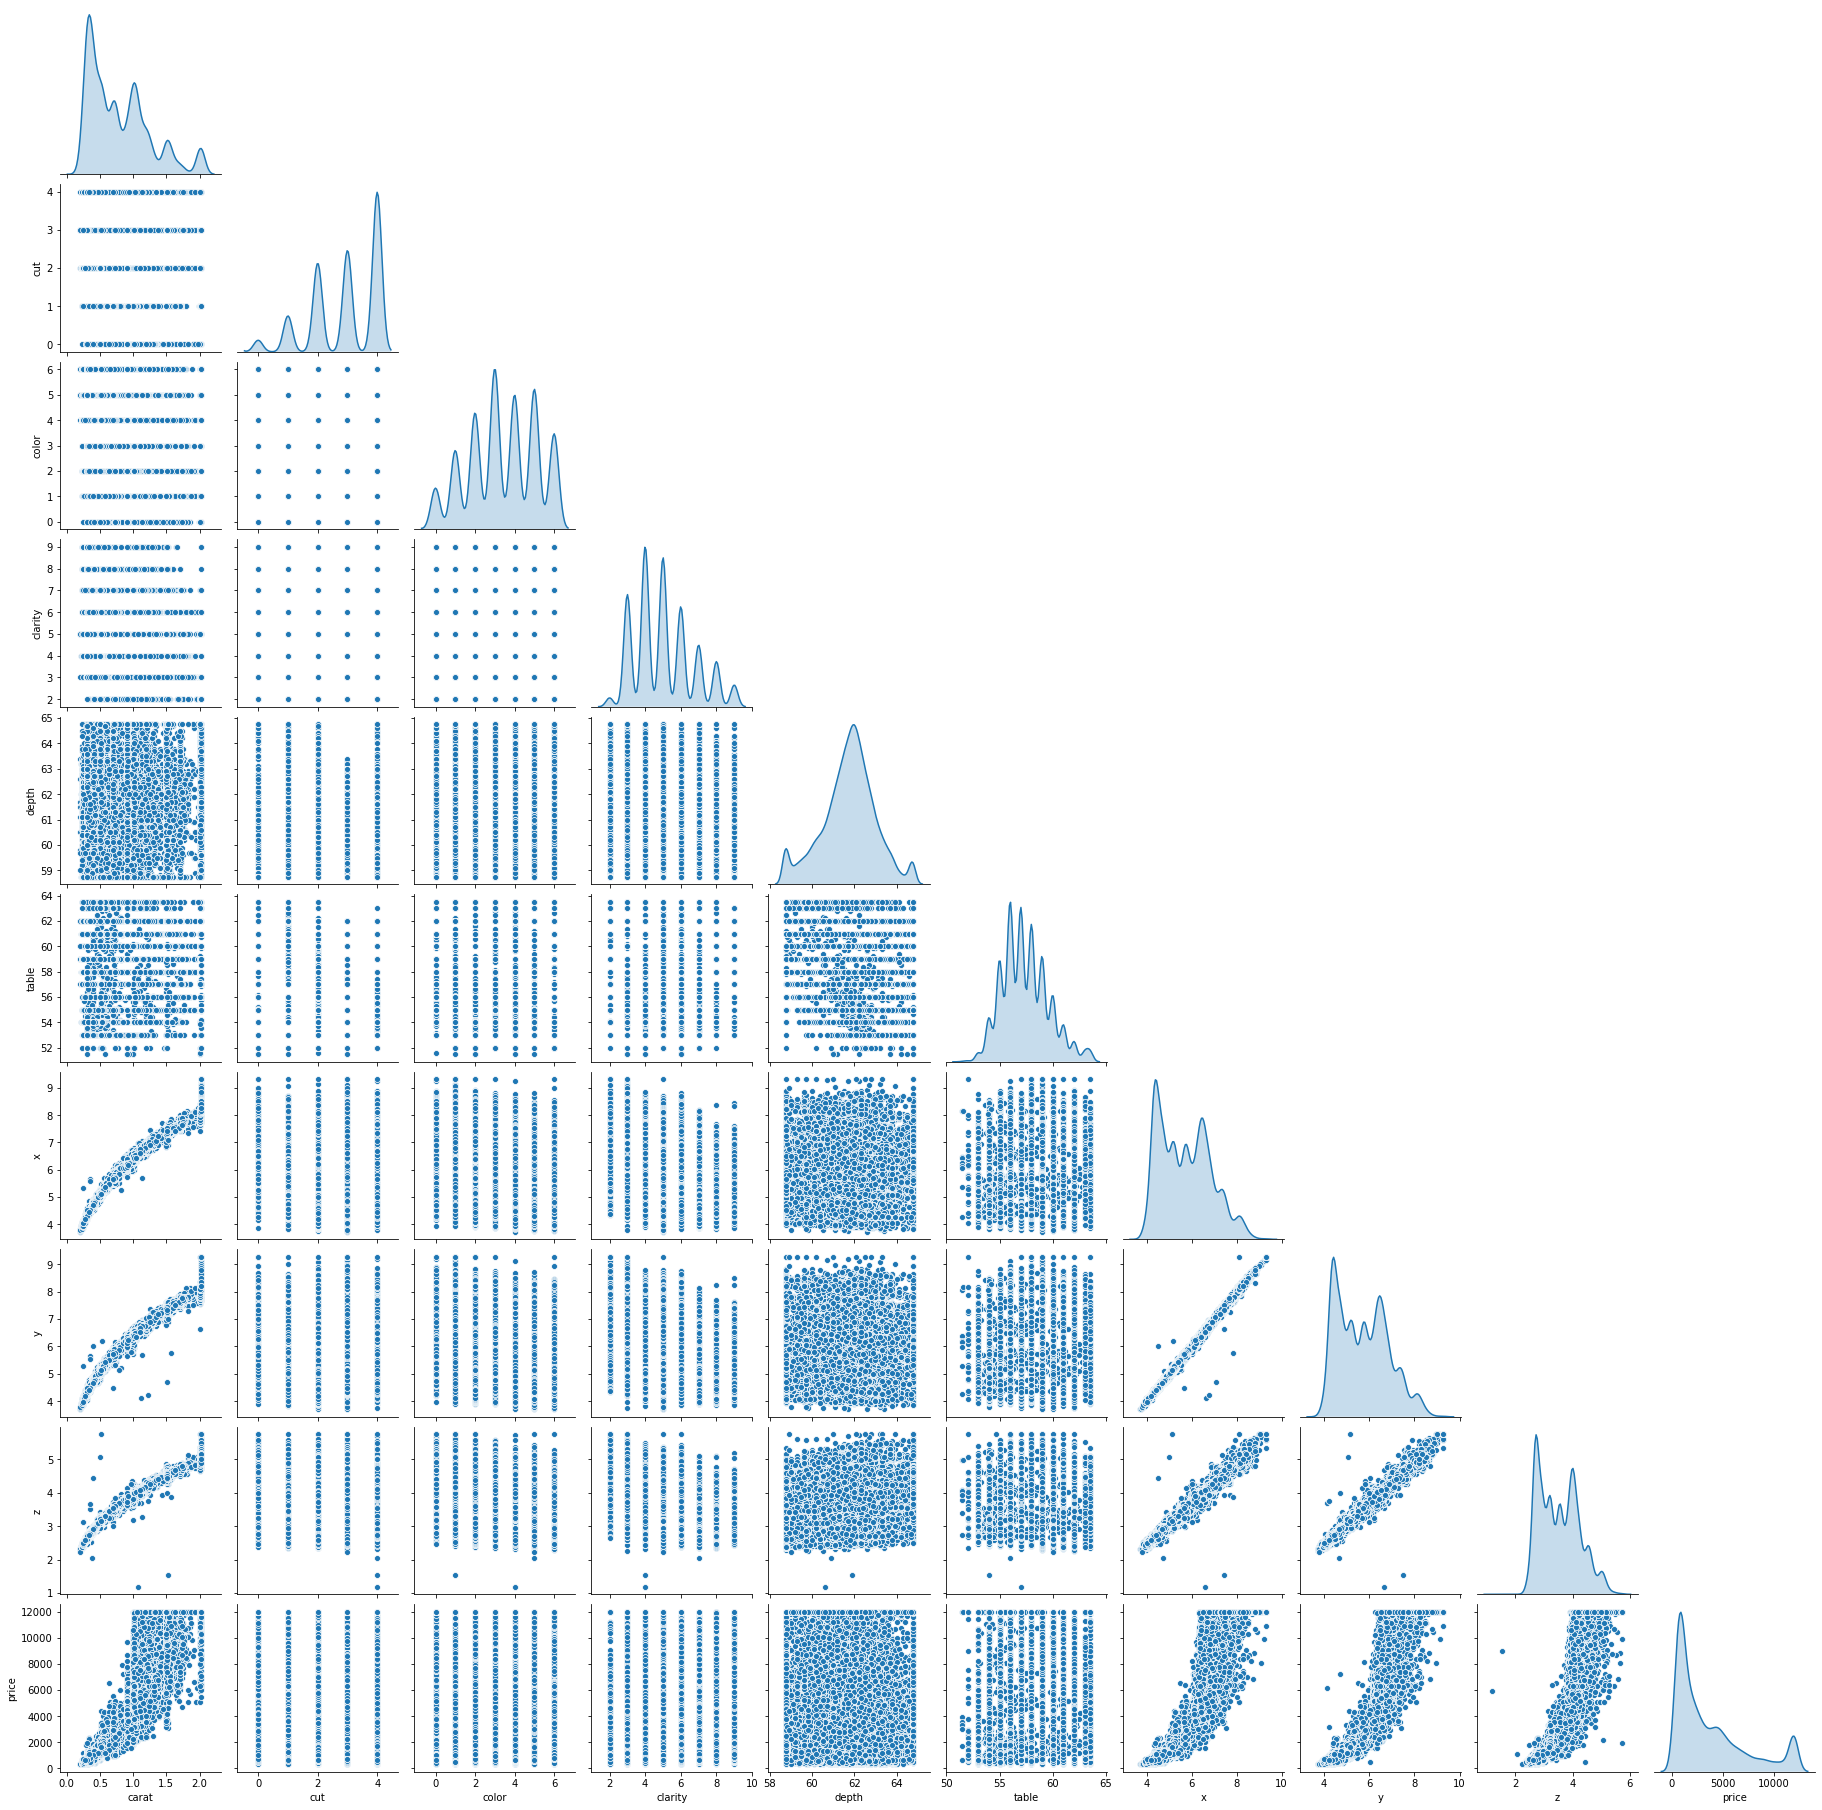

In [84]:
#Check linearity
sns.pairplot(df_c, corner = True, diag_kind = 'kde');

In [85]:
#Variation inflation factor for testing multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 32.883884359145554
cut ---> 1.5098926298254
color ---> 1.1201451359826302
clarity ---> 1.2419497346051338
depth ---> 5.173963738602187
table ---> 1.6314335303421823
x ---> 423.0744134630289
y ---> 412.65279898201845
z ---> 269.92694788600625


In [86]:
#Final Linear regression model
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.17) * carat + (0.04) * cut + (0.21) * clarity + (0.14) * color + (-0.12) * x + 

The final Linear Regression equation is  
  
<b>price = b0 + b1 * carat + b2 * cut + b3 * clarity + b4 * color + b5 * x 
  
price =  Intercept (0.00) + (1.17) * carat + (0.04) * cut + (0.21) * clarity + (0.14) * color + (-0.12) * x 
</b>
  
When carat increases by 1 unit, price increases by 1.18 units, keeping all other predictors constant.    
  
There are also some negative co-efficient values, for instance, x (length) has its corresponding co-efficient as -0.36. This implies, when the x increases by 1 unit, the price increases by -0.36 units, keeping all other predictors constant.



<b> 1.4 Inference: Basis on these predictions, what are the business insights and recommendations. </b>
<a id='1.4'></a>

In [87]:
df_c.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.793298,2.909702,3.394794,5.053577,61.742884,57.435544,5.729601,5.731526,3.537836,3735.832213
std,0.462127,1.113165,1.705883,1.646749,1.260647,2.157119,1.125704,1.117663,0.695777,3468.207359
min,0.200000,0.000000,0.000000,2.000000,58.750000,51.500000,3.730000,3.710000,1.190000,326.000000
25%,0.400000,2.000000,2.000000,4.000000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,3.000000,3.000000,5.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,4.000000,5.000000,6.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,2.025000,4.000000,6.000000,9.000000,64.750000,63.500000,9.310000,9.270000,5.750000,11972.500000


In [88]:
bins = [0.2,0.8,1.4,2.0,2.7]
label =['1','2','3','4']
df_c['carat_bin'] = pd.cut(df_c.carat,bins,right=False,labels=label)
df_c['carat_bin'] = df_c['carat_bin'].astype(int)
df_c[['carat_bin','price']].groupby(['carat_bin']).mean()
# sns.countplot(holiday['Age_Category'], hue = holiday['Holliday_Package'])


,price
carat_bin,
1,1362.824217
2,5536.455286
3,10062.361163
4,11701.545000


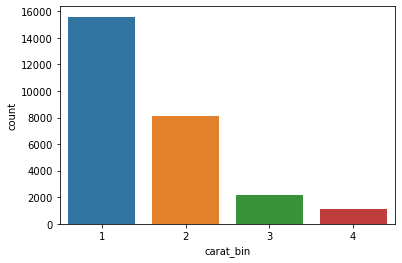

In [89]:
sns.countplot(df_c['carat_bin']);

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black"> <u> Problem 2 - Logistic Regression and LDA
<a id='Problem_2'></a>
    
<font color=darkblue>You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

 </font> 

<b> 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. </b>
<a id='2.1'></a>

In [90]:
#Read the dataset
holiday = pd.read_csv('Holiday_Package.csv')

In [91]:
#Checking the head of the dataset
holiday.head(5)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [92]:
#Dropping 'Unnamed: 0' column
holiday = holiday.drop('Unnamed: 0', axis =1)

In [93]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [94]:
#Information of the dataset
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [95]:
#Shape of the dataset
print('There are ',holiday.shape[0],' rows and ',holiday.shape[1],' columns in the dataset')

There are  872  rows and  7  columns in the dataset


In [96]:
#Summary statistics of numerical datatypes
holiday.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [97]:
#Summary statistics of categorical variable
holiday.describe(include = 'object')

,Holliday_Package,foreign
count,872,872
unique,2,2
top,no,no
freq,471,656


In [98]:
holiday['Holliday_Package'].value_counts(normalize = True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [99]:
holiday['foreign'].value_counts(normalize = True)

no     0.752294
yes    0.247706
Name: foreign, dtype: float64

In [100]:
#Null value check
holiday.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [101]:
#Duplicate records check
dup = holiday.duplicated()
dup.sum()

0

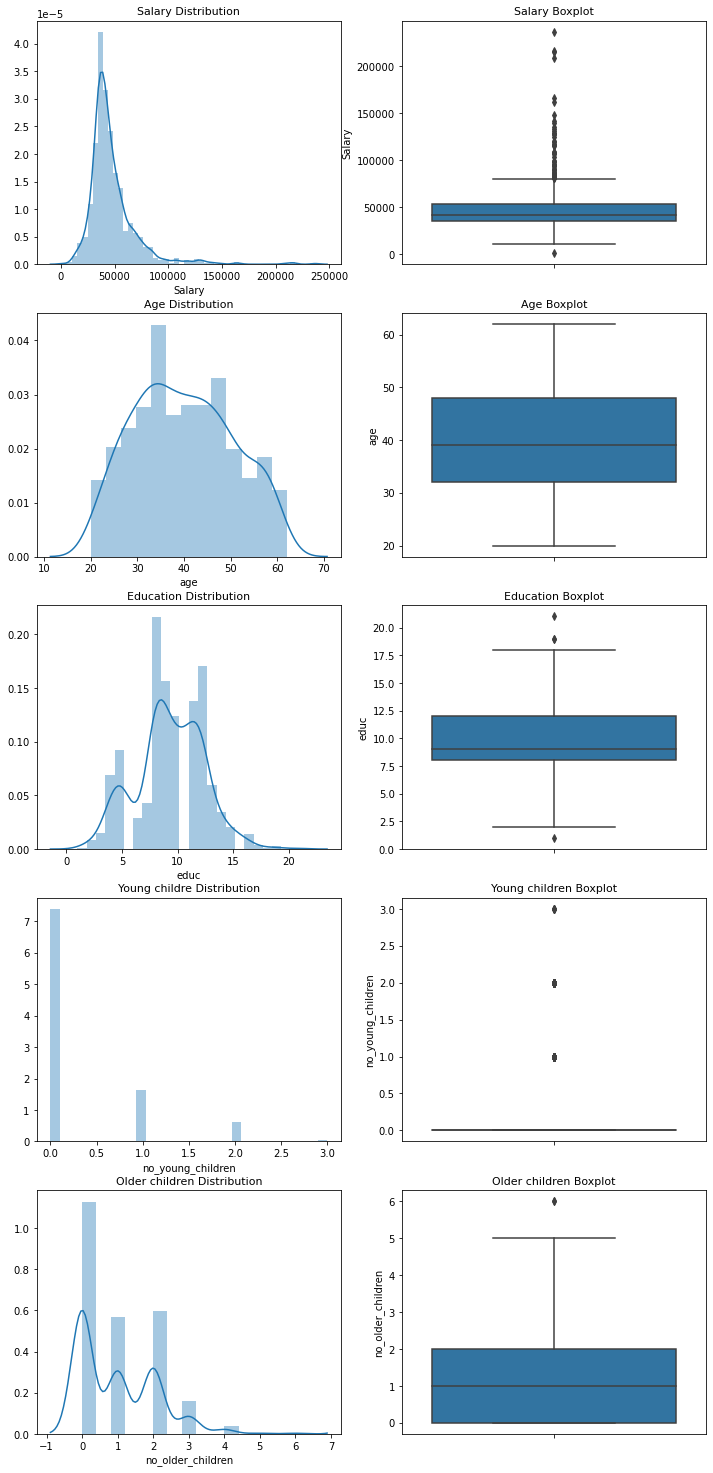

In [102]:
## Univariate Analysis

fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 26)

a = sns.distplot(holiday.Salary , ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=11)
a = sns.boxplot(holiday.Salary , orient = "v" , ax=axes[0][1])
a.set_title("Salary Boxplot",fontsize=11)

a = sns.distplot(holiday.age, ax=axes[1][0])
a.set_title("Age Distribution",fontsize=11)
a = sns.boxplot(holiday.age , orient = "v" , ax=axes[1][1])
a.set_title("Age Boxplot",fontsize=11)

a = sns.distplot(holiday.educ, ax=axes[2][0])
a.set_title("Education Distribution",fontsize=11)
a = sns.boxplot(holiday.educ, orient = "v" , ax=axes[2][1])
a.set_title("Education Boxplot",fontsize=11)

a = sns.distplot(holiday['no_young_children'] , ax=axes[3][0])
a.set_title("Young childre Distribution",fontsize=11)
a = sns.boxplot(holiday['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("Young children Boxplot",fontsize=11)

a = sns.distplot(holiday['no_older_children'] , ax=axes[4][0])
a.set_title("Older children Distribution",fontsize=11)
a = sns.boxplot(holiday['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("Older children Boxplot",fontsize=11)
plt.show()

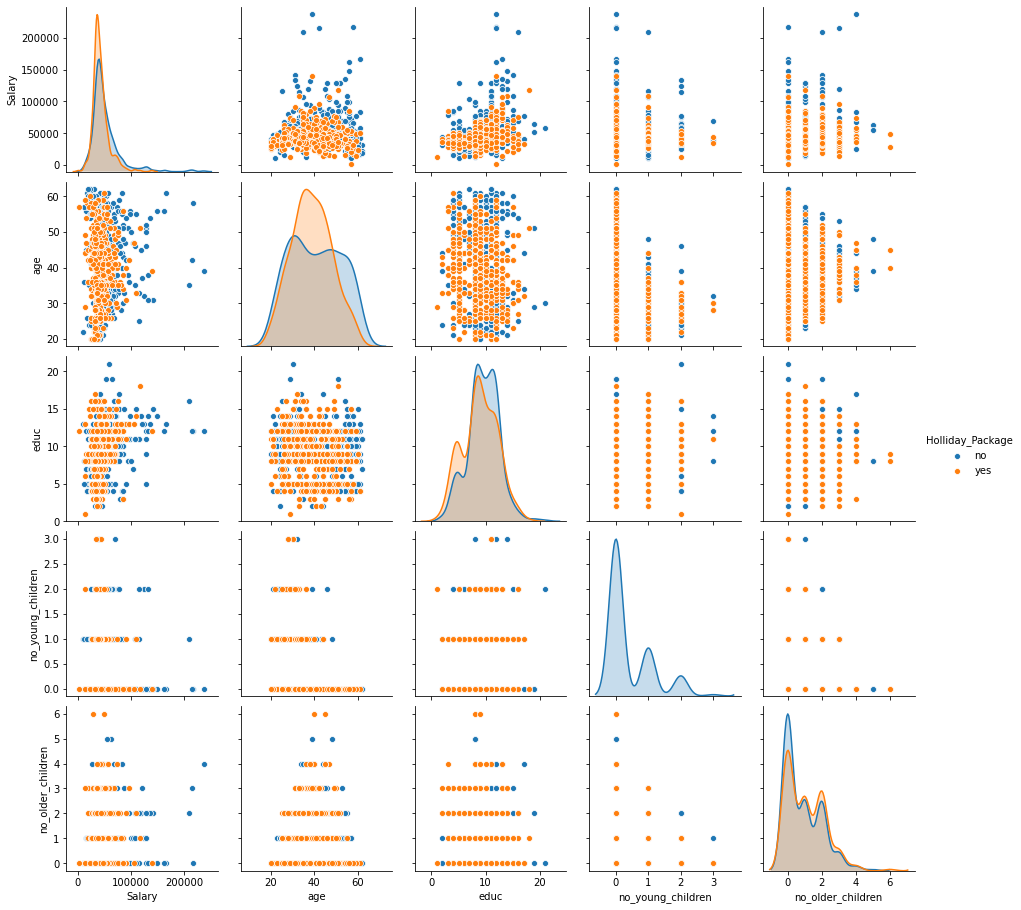

In [103]:
#Multivariate analysis using pairplot
sns.pairplot(holiday, hue = 'Holliday_Package');

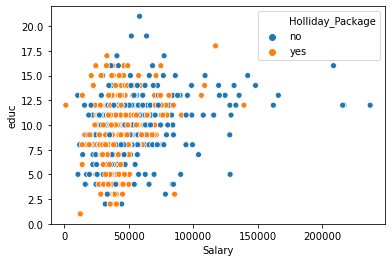

In [104]:
sns.scatterplot(holiday.Salary, holiday.educ, holiday['Holliday_Package']);

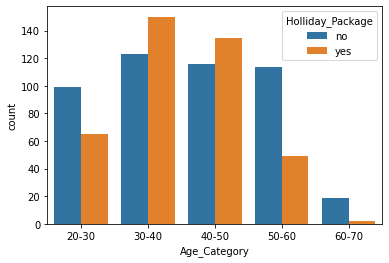

In [105]:
bins = [20,30,40,50,60,70]
label =['20-30','30-40','40-50','50-60','60-70']
holiday['Age_Category'] = pd.cut(holiday['age'],bins,right=False,labels=label)
holiday.head()
sns.countplot(holiday['Age_Category'], hue = holiday['Holliday_Package']);

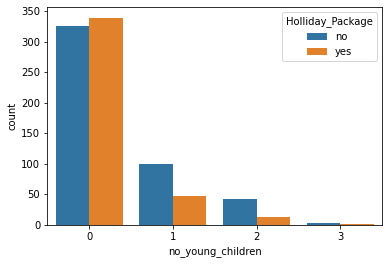

In [106]:
sns.countplot(holiday['no_young_children'], hue = holiday['Holliday_Package']);

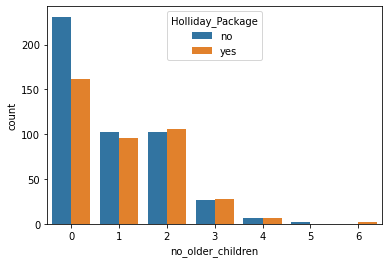

In [107]:
sns.countplot(holiday['no_older_children'], hue = holiday['Holliday_Package']);

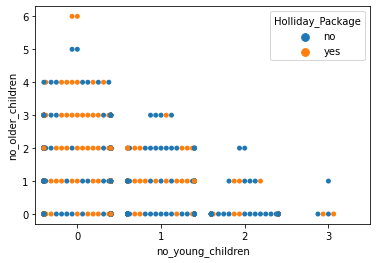

In [108]:
sns.swarmplot(holiday['no_young_children'], holiday['no_older_children'], holiday['Holliday_Package']);

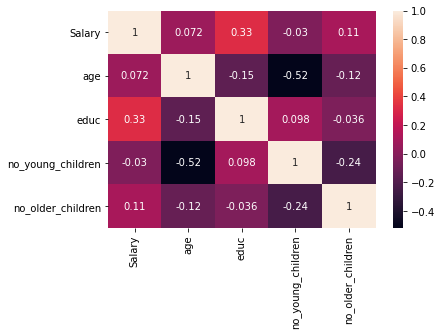

In [109]:
corr = holiday.corr()
sns.heatmap(corr, annot = True);

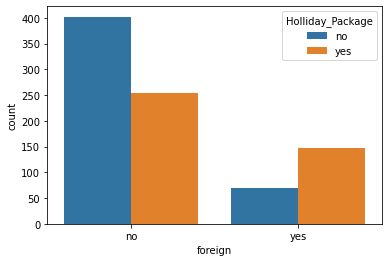

In [110]:
sns.countplot(holiday['foreign'], hue = holiday['Holliday_Package']);

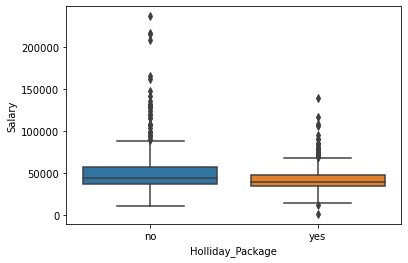

In [111]:
sns.boxplot(holiday['Holliday_Package'], holiday.Salary);

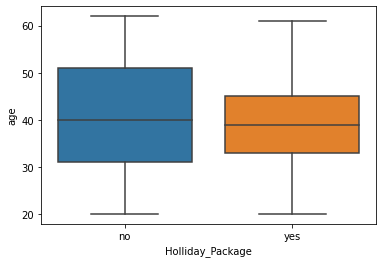

In [112]:
sns.boxplot(holiday['Holliday_Package'], holiday.age);

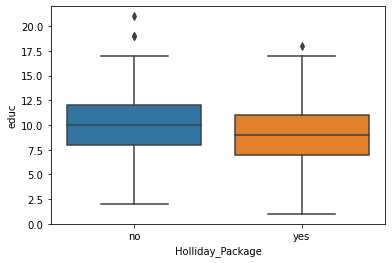

In [113]:
sns.boxplot(holiday['Holliday_Package'], holiday.educ);

<b> 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis). </b>
<a id='2.2'></a>

In [114]:
#Encoding the columns which has string values using pd.Categorical Since there are only two categories 'yes' or 'no'

for feature in holiday.columns: 
    if holiday[feature].dtype == 'object': 
        print(feature)
        print(holiday[feature].value_counts())
        print('\n')
        

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [115]:
for feature in holiday.columns: 
    if holiday[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(holiday[feature].unique()))
        print(pd.Categorical(holiday[feature].unique()).codes)
        holiday[feature] = pd.Categorical(holiday[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [116]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,Age_Category
0,0,48412,30,8,1,1,0,30-40
1,1,37207,45,8,0,1,0,40-50
2,0,58022,46,9,0,0,0,40-50
3,0,66503,31,11,2,0,0,30-40
4,0,66734,44,12,0,2,0,40-50


In [117]:
holiday.groupby('Holliday_Package').mean()

,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,
0,51739.443737,40.853503,9.594480,0.409766,0.902335,0.146497
1,43018.852868,38.900249,8.970075,0.197007,1.077307,0.366584


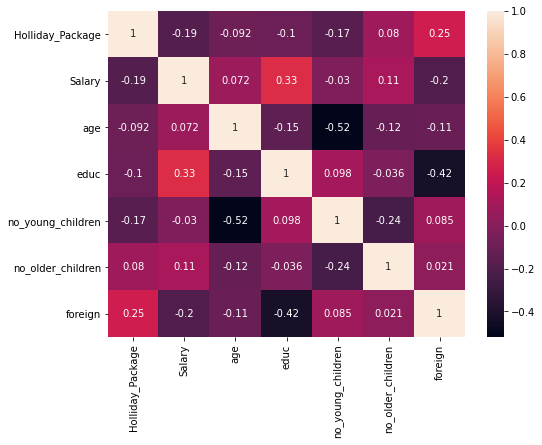

In [118]:
corr = holiday.corr()
plt.figure(figsize =(8,6))
sns.heatmap(corr, annot = True);

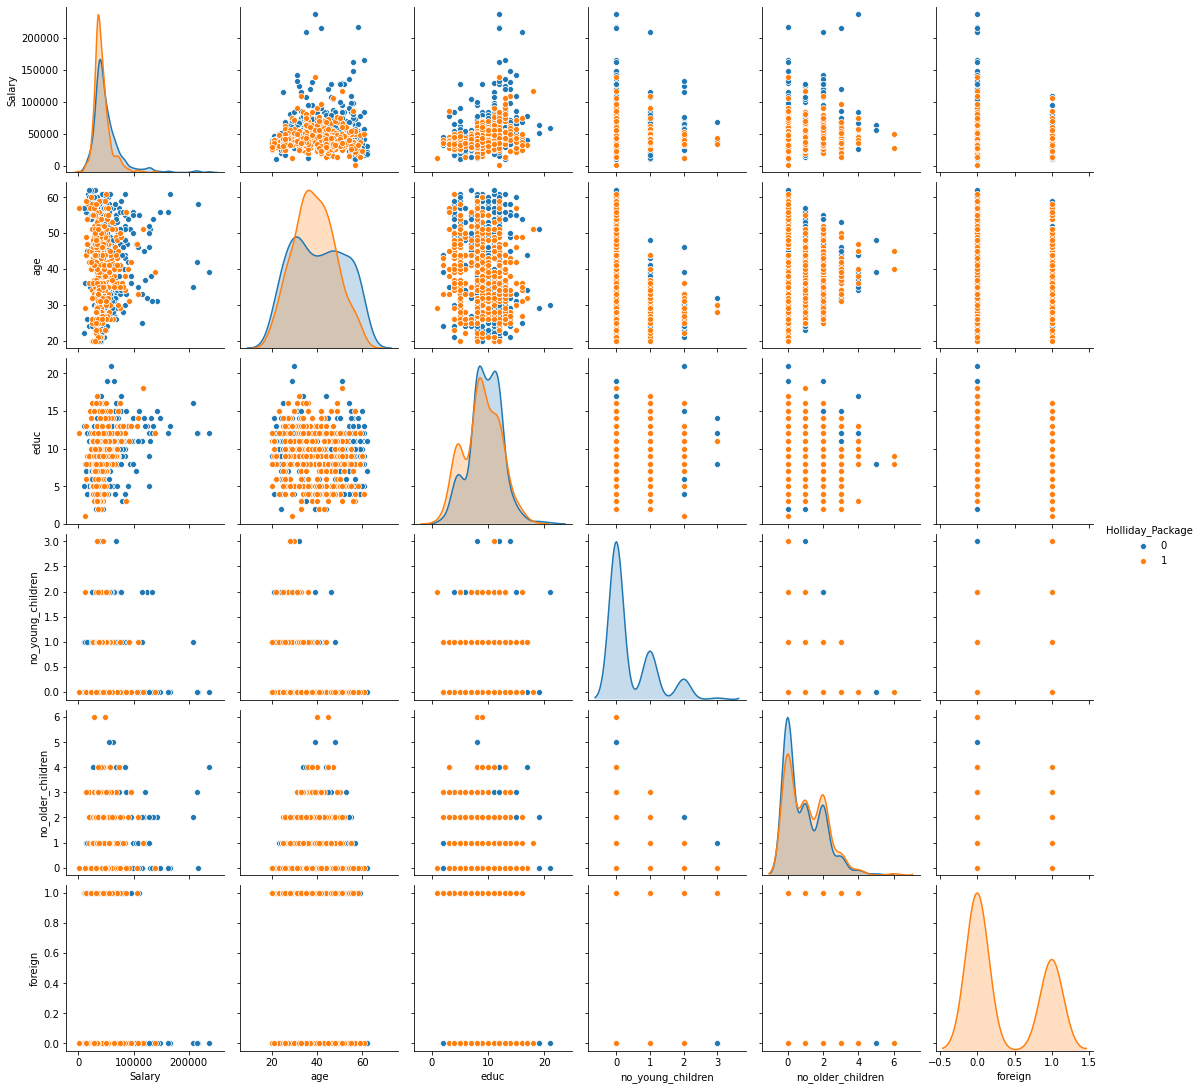

In [119]:
sns.pairplot(holiday, hue ='Holliday_Package');

In [127]:
#Data Split: Split the data into train and test (70:30)

# Copy all the predictor variables into X dataframe
X = holiday.drop(['Holliday_Package','no_older_children','Age_Category'], axis=1)

# Copy target into the y dataframe. 
y = holiday['Holliday_Package']


In [128]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)
#statify = y is used to split the dataset into train and test with same proportion of 'yes' and 'no' category as in the original dataset

In [129]:
y_train.value_counts(normalize = True)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [130]:
y_test.value_counts(normalize = True)
#Approximately test and training sets have same proportion of '0' and '1'

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

##### Logistic Regression model

In [131]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.613067
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Sat, 16 Jan 2021   Pseudo R-squ.:                  0.1114
Time:                        20:07:45   Log-Likelihood:                -534.59
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 5.338e-28
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Salary            -1.472e-05   3.93e-06     -3.742      0.000   -2.24e-05   -7.01e-06
age     

In [132]:
grid={'penalty':['l1','l2','elastic-net','none'],
      'solver':['sag','lbfgs','liblinear','newton-dg','saga'],
      'tol':[0.0001,0.000001]}

In [133]:
model1 = LogisticRegression(max_iter=10000, verbose = True)

In [134]:
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [135]:
grid_search.fit(X_train, y_train)

[LibLinear]

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elastic-net', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear', 'newton-dg',
                                    'saga'],
                         'tol': [0.0001, 1e-06]},
             scoring='accuracy')

In [136]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear', tol=1e-06,
                   verbose=True)


In [137]:
best_model1 = grid_search.best_estimator_

In [138]:
# Prediction on the training set and testing set

ytrain_predict = best_model1.predict(X_train)
ytest_predict = best_model1.predict(X_test)

In [139]:
# Getting the probabilities on the train set and  test set

ytrain_predict_prob=best_model1.predict_proba(X_train)
ytest_predict_prob=best_model1.predict_proba(X_test)

pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.677952,0.322048
1,0.568767,0.431233
2,0.689577,0.310423
3,0.516185,0.483815
4,0.541628,0.458372


In [140]:
print('Accuracy of training data: ',best_model1.score(X_train,y_train)) #Training set accuracy
print('Accuracy of testing data: ',best_model1.score(X_test,y_test)) #Testing set accuracy

Accuracy of training data:  0.6655737704918033
Accuracy of testing data:  0.6641221374045801


##### LDA model

In [141]:
grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.0001,0.00001]}

In [142]:
#Building the model
model2 = LinearDiscriminantAnalysis()

In [143]:
grid_search = GridSearchCV(estimator = model2, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [144]:
#Fit the model on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [145]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [146]:
model2 = grid_search.best_estimator_

In [147]:
#Predict on train and test data
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model2.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model2.predict(X_test)

In [148]:
# Training Data Probability Prediction
pred_prob_train = model2.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model2.predict_proba(X_test)

In [149]:
pd.DataFrame(pred_prob_test).head()

,0,1
0,0.711940,0.288060
1,0.544269,0.455731
2,0.721473,0.278527
3,0.500140,0.499860
4,0.539389,0.460611


In [150]:
print('Accuracy of the training set: ',model2.score(X_train,y_train))
print('Accuracy of the training set: ',model2.score(X_test, y_test))

Accuracy of the training set:  0.6672131147540984
Accuracy of the training set:  0.6526717557251909


<b> 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized. </b>
<a id='2.3'></a>

##### Logistic Regression model performance metrics

AUC for the Training Data: 0.734
AUC for the Test Data: 0.718


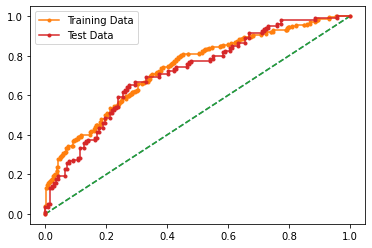

In [151]:
# AUC and ROC for the training data

# calculate AUC
auc = roc_auc_score(y_train,ytrain_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,ytest_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

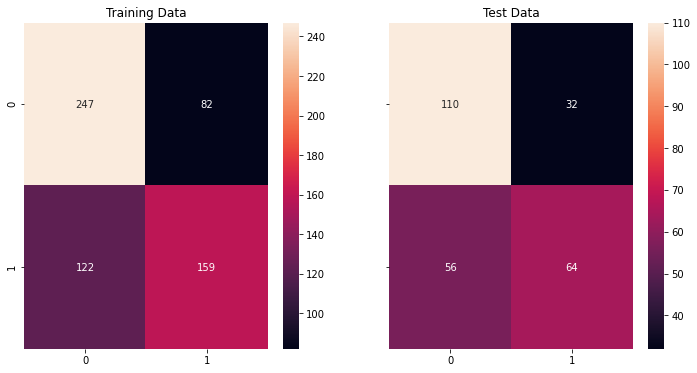

In [152]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize =(12,6))

#Plotting confusion matrix for the training and testing data

plot_0 = sns.heatmap((confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [153]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.67      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.66       262
 



0.1 

Accuracy Score 0.4852
F1 Score 0.6416 

Confusion Matrix


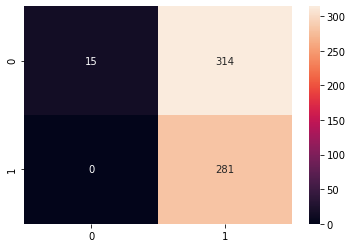

0.2 

Accuracy Score 0.518
F1 Score 0.6475 

Confusion Matrix


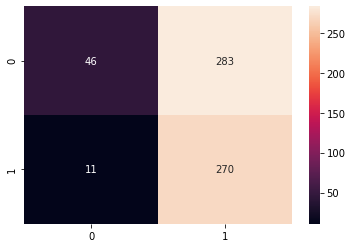

0.3 

Accuracy Score 0.5885
F1 Score 0.6684 

Confusion Matrix


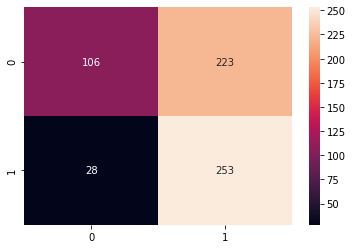

0.4 

Accuracy Score 0.6672
F1 Score 0.6813 

Confusion Matrix


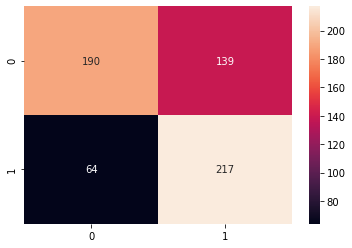

0.5 

Accuracy Score 0.6656
F1 Score 0.6092 

Confusion Matrix


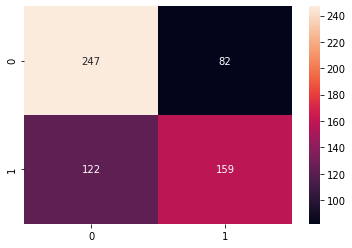

0.6 

Accuracy Score 0.6508
F1 Score 0.5126 

Confusion Matrix


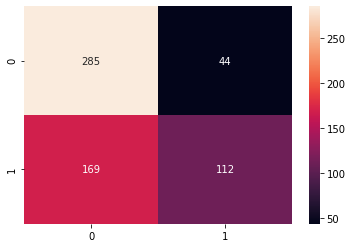

0.7 

Accuracy Score 0.641
F1 Score 0.4097 

Confusion Matrix


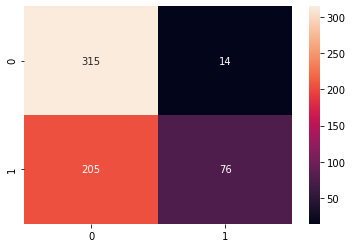

0.8 

Accuracy Score 0.5754
F1 Score 0.1508 

Confusion Matrix


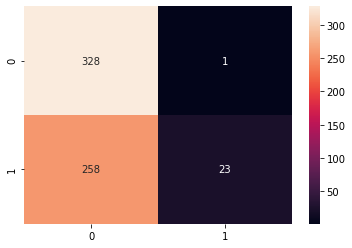

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


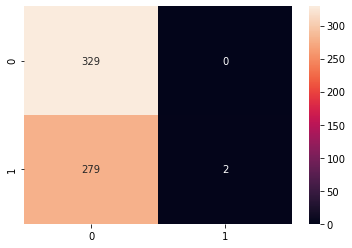

In [154]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(ytrain_predict_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

0.1 

Accuracy Score 0.4733
F1 Score 0.6349 

Confusion Matrix


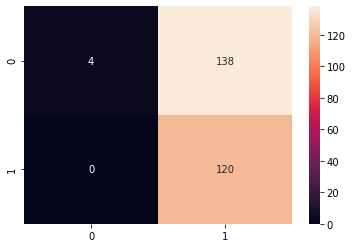

0.2 

Accuracy Score 0.5153
F1 Score 0.6521 

Confusion Matrix


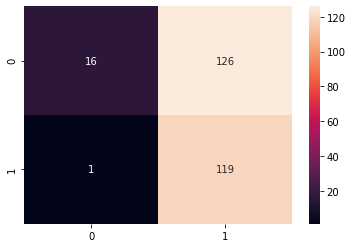

0.3 

Accuracy Score 0.5763
F1 Score 0.6706 

Confusion Matrix


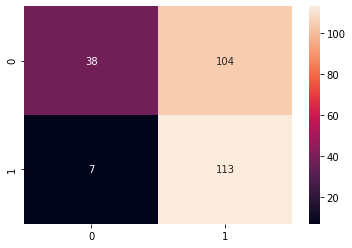

0.4 

Accuracy Score 0.6336
F1 Score 0.6496 

Confusion Matrix


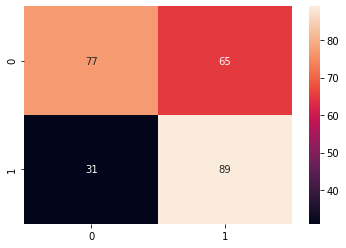

0.5 

Accuracy Score 0.6641
F1 Score 0.5926 

Confusion Matrix


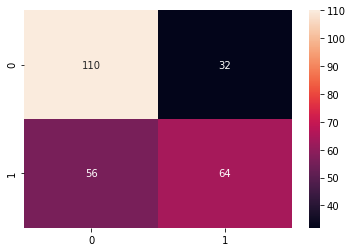

0.6 

Accuracy Score 0.6336
F1 Score 0.4839 

Confusion Matrix


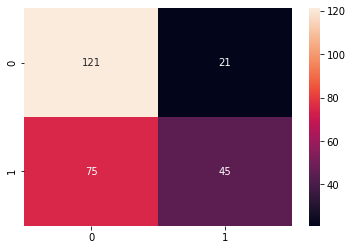

0.7 

Accuracy Score 0.6031
F1 Score 0.3067 

Confusion Matrix


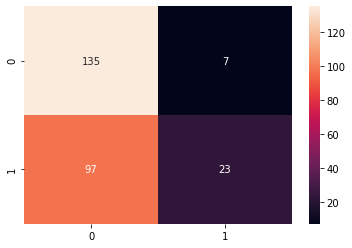

0.8 

Accuracy Score 0.5611
F1 Score 0.1085 

Confusion Matrix


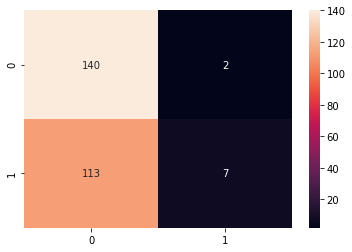

0.9 

Accuracy Score 0.5458
F1 Score 0.0165 

Confusion Matrix


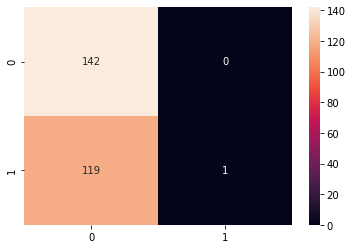

In [155]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_test)):#defining a loop for the length of the test data
        if np.array(ytest_predict_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_test,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

##### LDA Performance metrics


AUC for the Training Data: 0.733
AUC for the Test Data: 0.715


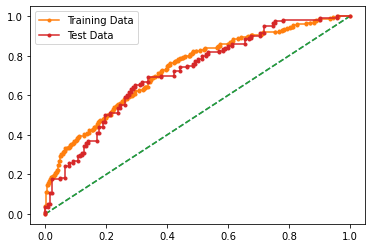

In [156]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

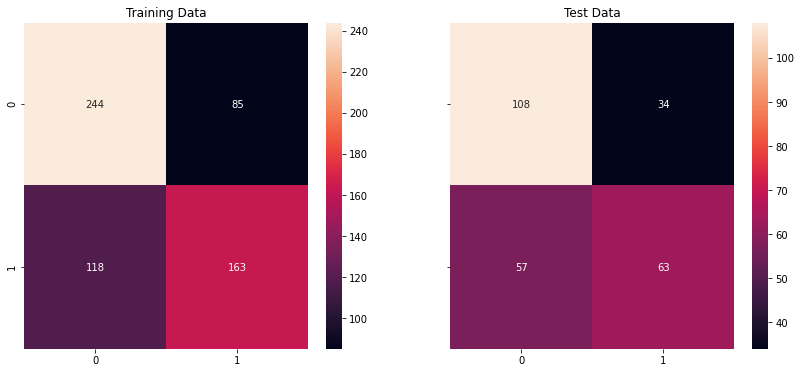

In [157]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize =(14,6))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [158]:
print('Classification Report of the training data:\n\n',classification_report(y_train, pred_class_train),'\n')
print('Classification Report of the test data:\n\n',classification_report(y_test, pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.53      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


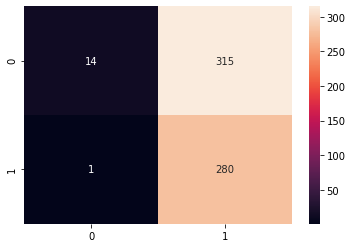

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


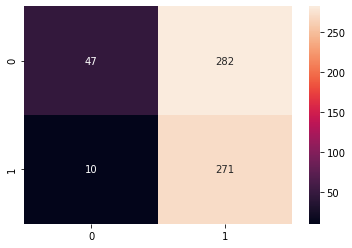

0.3 

Accuracy Score 0.5951
F1 Score 0.6702 

Confusion Matrix


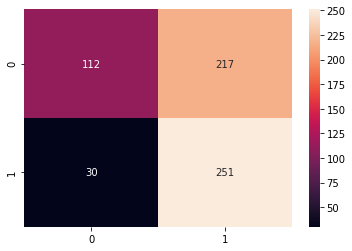

0.4 

Accuracy Score 0.6639
F1 Score 0.6772 

Confusion Matrix


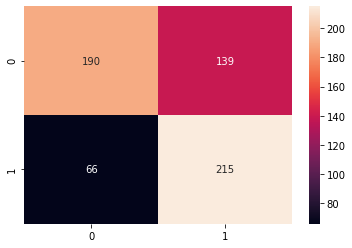

0.5 

Accuracy Score 0.6672
F1 Score 0.6163 

Confusion Matrix


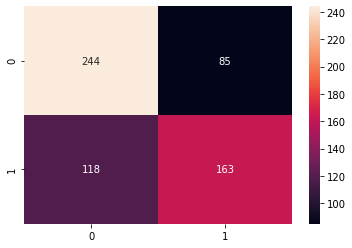

0.6 

Accuracy Score 0.6541
F1 Score 0.5258 

Confusion Matrix


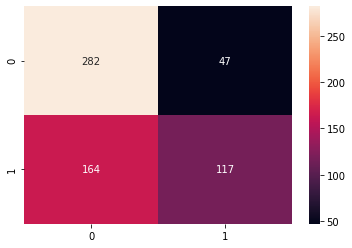

0.7 

Accuracy Score 0.6459
F1 Score 0.4316 

Confusion Matrix


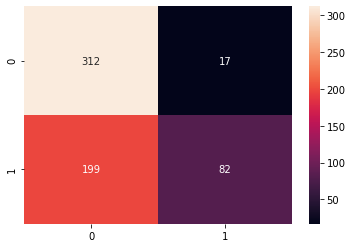

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


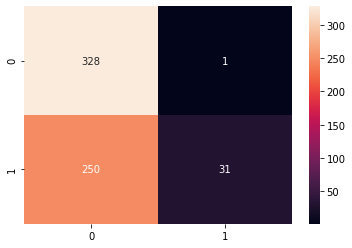

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


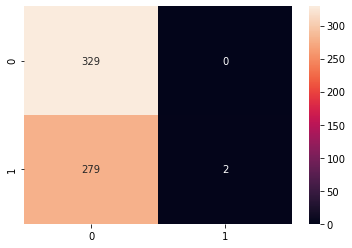

In [159]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

0.1 

Accuracy Score 0.4695
F1 Score 0.6332 

Confusion Matrix


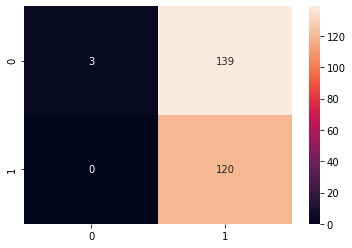

0.2 

Accuracy Score 0.5153
F1 Score 0.6501 

Confusion Matrix


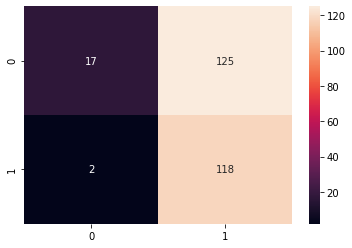

0.3 

Accuracy Score 0.584
F1 Score 0.6646 

Confusion Matrix


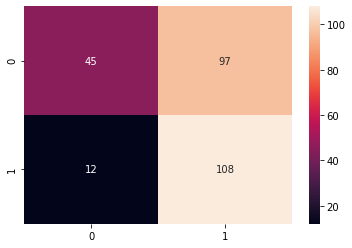

0.4 

Accuracy Score 0.6336
F1 Score 0.6444 

Confusion Matrix


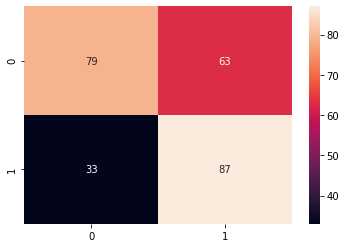

0.5 

Accuracy Score 0.6527
F1 Score 0.5806 

Confusion Matrix


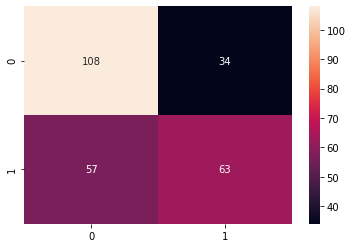

0.6 

Accuracy Score 0.6221
F1 Score 0.4706 

Confusion Matrix


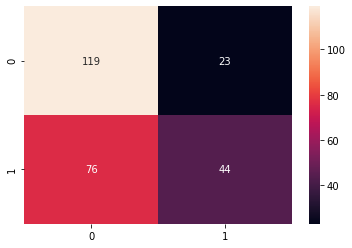

0.7 

Accuracy Score 0.5954
F1 Score 0.3026 

Confusion Matrix


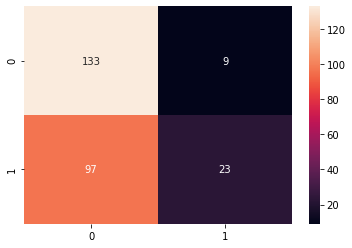

0.8 

Accuracy Score 0.5687
F1 Score 0.1374 

Confusion Matrix


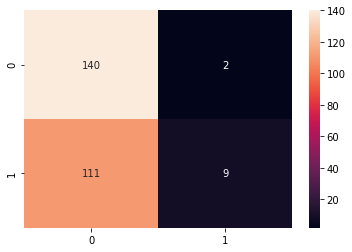

0.9 

Accuracy Score 0.5458
F1 Score 0.0165 

Confusion Matrix


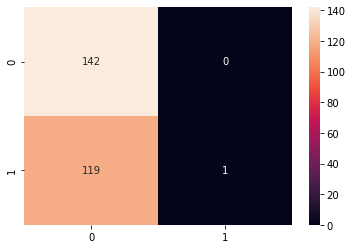

In [160]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_test)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_test,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

<b> 2.4 Inference: Basis on these predictions, what are the insights and recommendations. </b>
<a id='2.4'></a>

Insights from the model:


    •	54% of the data points are in ‘No’ category of holiday package and 46% of the data points are in ‘Yes’ category. Since the data points are balanced between the categories, model accuracy score is a reliable performance mease.
    •	Out of the two models, Logistic regression has performed consistently with both training and testing data.
    Our business problem is to identify the holiday package, we are focused on determining the false positives and false negatives.
    •	False positive (FP) - Datapoints that are actually false but predicted as true.  This is also known as type 1 error. In order to reduce the type 1 error, we have to increase the precision of the model (among the points identified as positives by the model how many are actually positive). 
    Type 1 error in this case study means model has classified the data point as 1 instead of 0. The tour agency will most likely miss out on these employees who are not going to opt in for the package. This type of error is of priority in this business context, since tagging the actual negative as positive affects the agencies scope of expanding business by selling the package.
    •	False negative (FN) – Datapoints that are actually true but predicted as false. This is known as type 2 error. In order to reduce to type 2 error. We have to increase recall (how many actual true data points are identified as true by the model)
    Type 2 error is might not be of priority for our case study, since predicting the actual true data points are false will not cause any damages to the tour agency because the employees will anyway opt for the package irrespective of any incentives from the tour agency.


Recommendations for the business:


If the holiday package comes out as Yes: 

    •	Targeting those employees who are likely to opt in for the package by giving them extra benefits like discounted stays, exclusive offers, free tour planners and guides would help the agency to attract the employees and retain the business.
    •	For foreign employees, language translator can be allotted as an add-on travel package service.
    •	Suggesting a travel itinerary as a complimentary gift for the employees who opt-in will help the agency to grab those employees who are not sure how to plan.
    
If the holiday package comes out as No:

    •	Offering insurance coverage or highlighting the benefits of the agency’s services will help the agency to engage the employees for opting in.
    •	Suggesting additional products on top of the standard package, like offering free breakfast for the entire stay, complimentary services related to the destination will attract the employees.
    •	Making the travel booking hassle free.
    •	Engaging employees who are below the age of 30 and above 50 by suggesting places suitable for these age groups.
    •	Arranging care taker for employees having young/older children during their holiday would definitely attract employees to opt in for the holiday package. 
    
Here we have built model with 5 independent variables for predicting the ‘Holliday_Package’ dependent variable.  If we had some more factors like consumer behavioural patterns, social conditions and individual needs those of which can affect the holiday package status predominantly could make the model better in predicting ‘Yes’ stances.



